Label
BENIGN              635259
DDoS                128027
DoS Hulk             23107
PortScan             15893
DoS GoldenEye         1029
FTP-Patator            793
SSH-Patator            589
DoS slowloris          579
DoS Slowhttptest       549
Bot                    196
Infiltration             3
Heartbleed               1
Name: count, dtype: int64


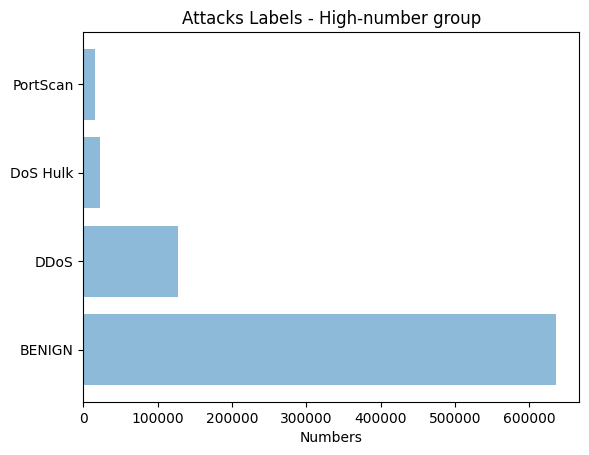

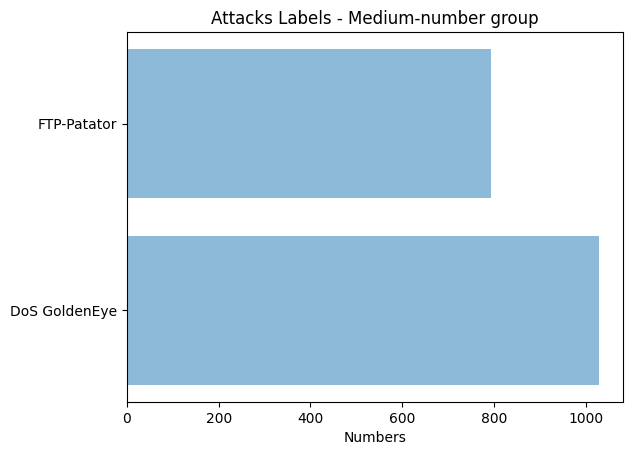

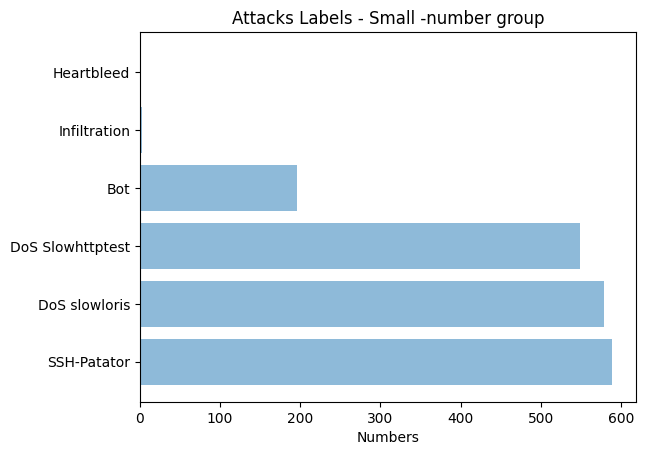

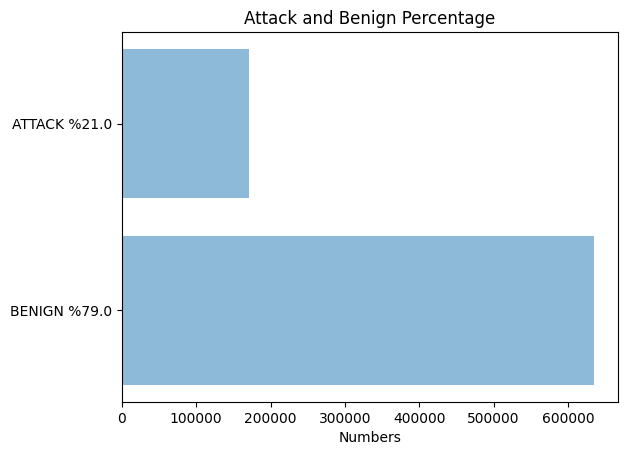

mission accomplished!
Total operation time: =  1.1118130683898926 seconds


In [7]:
##  all_data.csv files is required for the operation of the program.
##  all_data.csv file must be located in the same directory as the program.



##  The purpose of this program is to provide statistics about the data contained in the dataset.
##  Considering that some of the data are very large and some of them are very small, the graphics are created in three separate groups, so that all data can be seen:
##          big: labels with more than 11000 numbers
##          medium: labels with numbers between 600 and 11000
##          small: labels with fewer than 600 numbers
##  
##  In the last graphics, the rates of all attacks and normal behaviors are given.

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
import time
seconds = time.time()

#  graph creation function
def graph(objects,performance,x_label,y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()


df=pd.read_csv('all_data.csv', usecols=["Label"])
print(df.iloc[:,0].value_counts())
a=(df.iloc[:,0].value_counts())


key=a.keys()
values=a.values
small_labels=[]
small_values=[]
big_labels=[]
big_values=[]
medium_labels=[]
medium_values=[]
attacak=0
benign=0


## In this section, the attacks are grouped under 3 groups,
## so that all values can be seen on the graph.
for i in range(0,len(values)):
    if values[i]>11000:
        big_labels.append(str(key[i]))
        big_values.append(values[i])
    elif values[i]<600:
        small_labels.append(str(key[i]))
        small_values.append(values[i]) 
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(values[i])

    if str(key[i])=="BENIGN":
        benign+=values[i]
    else:
        attacak+=values[i]
        
key =[benign,attacak]


#functions are called to create a chartes
labels=["BENIGN %"+str(round(benign/(benign+attacak),2)*100),
        "ATTACK %"+str(round(attacak/(benign+attacak),2)*100)]
graph(big_labels,big_values,"Numbers","Attacks Labels - High-number group")
graph(medium_labels,medium_values,"Numbers","Attacks Labels - Medium-number group")
graph(small_labels,small_values,"Numbers","Attacks Labels - Small -number group")
graph(labels,key,"Numbers","Attack and Benign Percentage")



print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")